In [1]:
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
data = sp.genfromtxt('web_traffic.tsv', delimiter='\t')
# split the data, training and test set from inflection point
x = data[:,0]
y = data[:,1]
# Mean Squared Error for the model we choose",
def error(f, x, y):
    return sp.sum((f(x)-y)**2) # Seems to be MSE error.

x = x[~sp.isnan(y)] # Removing nans
y = y[~sp.isnan(y)]
# Polynomial of degree 1
fp1= sp.poly1d(sp.polyfit(x,y,1)) # Least Linear Equation, assume line is linear
fp1_error= error(fp1,x,y) # MSE Error 
print("Polynomial Degree 1",fp1)
print("Error Degree 1",fp1_error)

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title("Web traffic over the last month with Degree 1")
plt.xlabel("Time/Hours")
plt.ylabel("Web Hits")
plt.xticks([w*7*24 for w in range(10)],["week %i"%w for w in range(10)])
fx1 = sp.linspace(0,x[-1], 1000) # generating evenly space numbers for x axis
plt.plot(fx1, fp1(fx1),'r')
plt.grid()
# Polynomial of Degree 2

fp2 = sp.poly1d(sp.polyfit(x,y,2))
fp2_error = error(fp2,x,y)
print("********************************")
print("Polynomial Degree 2",fp2)
print("Error Degree 2 ",fp2_error)
print("********************************")
# Degree Comparision 
print("Degree Difference",fp1_error-fp2_error)

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title("Web traffic over the last month with Degree 2")
plt.xlabel("Time/Hours")
plt.ylabel("Web Hits")
plt.xticks([w*7*24 for w in range(10)],["week %i"%w for w in range(10)])
fx2 = sp.linspace(0,x[-1], 1000) # generating evenly space numbers for x axis
plt.plot(fx2, fp2(fx2),'r')
plt.grid()

Polynomial Degree 1  
2.596 x + 989
Error Degree 1 317389767.33977807
********************************
Polynomial Degree 2          2
0.01053 x - 5.265 x + 1975
Error Degree 2  179983507.8781792
********************************
Degree Difference 137406259.46159887


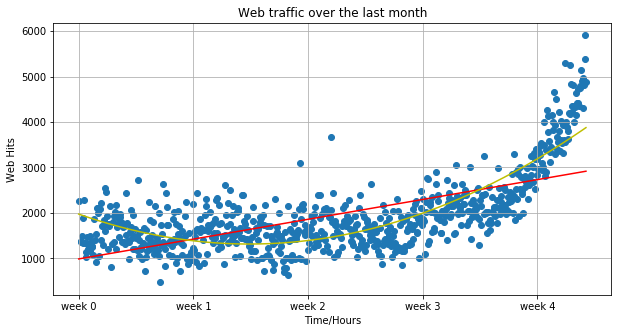

In [2]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time/Hours")
plt.ylabel("Web Hits")
plt.xticks([w*7*24 for w in range(10)],["week %i"%w for w in range(10)])
fx1 = sp.linspace(0,x[-1], 1000) # generating evenly space numbers for x axis
fx2 = sp.linspace(0,x[-1], 1000) # generating evenly space numbers for x axis
plt.plot(fx1, fp1(fx1),'r')
plt.plot(fx2, fp2(fx2),'y')
plt.grid()

Error at d=1 317389767.339778
Error at d=2 179983507.878179
Error at d=3 139350144.031725
Error at d=10 121942326.363548


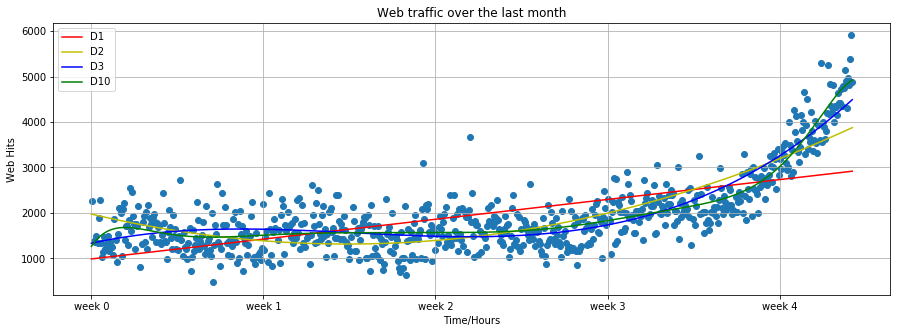

In [3]:
# lets see increasing Dimensions

fp3= sp.poly1d(sp.polyfit(x,y,3))
fp10= sp.poly1d(sp.polyfit(x,y,10))
for f in [fp1,fp2,fp3,fp10]:
    print("Error at d=%i %f"%(f.order,error(f,x,y)))
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time/Hours")
plt.ylabel("Web Hits")
plt.xticks([w*7*24 for w in range(10)],["week %i"%w for w in range(10)])
fx1 = sp.linspace(0,x[-1], 1000) # generating evenly space numbers for x axis
# fx2 = sp.linspace(0,x[-1], 1000) # generating evenly space numbers for x axis
plt.plot(fx1, fp1(fx1),'r',label="D1")
plt.plot(fx1, fp2(fx1),'y',label="D2")
plt.plot(fx1, fp3(fx1),'b',label="D3")
plt.plot(fx1, fp10(fx1),'g',label="D10")
# plt.plot(fx1, fp100(fx1),'black',label="D100")
plt.legend(loc=2)
plt.grid()

In [4]:
# Lets break into weeks 3.5(before inflection) and the rest(after inflection)

inflection = int(3.5 * 7 * 24) # calc in hours
xb = x[:inflection] # before
yb = y[:inflection]

xa = x[inflection:] # after
ya = y[inflection:]

# create the model using degree of 1

fb = sp.poly1d(sp.polyfit(xb, yb, 1)) #sp.polyfit(xa, ya, 1) returns Linear least square(linear regression) degree 1 \n",
fa = sp.poly1d(sp.polyfit(xa, ya, 1)) #sp.polyfit(xb, yb, 1) returns Linear least square(linear regression) degree 1\n",
print("Linear Equation 1 Dimensional",fb)
print("Linear Equation 1 Dimensional",fa)
fb_error = error(fb, xb, yb)
fa_error = error(fa, xa, ya)

# print("Error of 3.5 weeks",fb_error)
# print("Error of 0.5 weeks",fa_error)
print("Error Inflection = %f "%(fb_error+fa_error))

Linear Equation 1 Dimensional  
0.8399 x + 1400
Linear Equation 1 Dimensional  
21.07 x - 1.092e+04
Error Inflection = 132950348.197616 


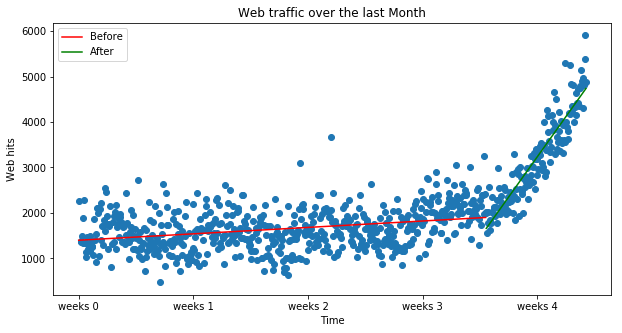

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title("Web traffic over the last Month")
plt.xlabel("Time")
plt.ylabel("Web hits")
plt.xticks([w*7*24 for w in range(10)],["weeks %s"%w for w in range(10)])
fxb = sp.linspace(0, xb[-1], 1000)
fxa = sp.linspace(xa[0], xa[-1], 1000)
plt.plot(fxb,fb(fxb),'r', label="Before")
plt.plot(fxa,fa(fxa),'g',label="After")
plt.legend(loc=2)
plt.show()


In [6]:
# Calculating Error after the inflection hours
# After Inflection
fa1 = fa
fa2 = sp.poly1d(sp.polyfit(xa,ya,2))
fa3 = sp.poly1d(sp.polyfit(xa,ya,3))
fa10= sp.poly1d(sp.polyfit(xa,ya,10))
print("Errors for only the time after inflection point")
for f in [fa1,fa2,fa3,fa10]:
    print("Error of inflection at d=%i %f" %(f.order, error(f,xa,ya)))

Errors for only the time after inflection point
Error of inflection at d=1 22143941.107618
Error of inflection at d=2 19768846.989176
Error of inflection at d=3 19766452.361027
Error of inflection at d=10 18949296.784337


/apps/PythonForDataScience/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RankWarning: Polyfit may be poorly conditioned


In [7]:
# Lets break the data into testing and training
# 70 percent training and 30 percent testing

frac = 0.3
split_idx = int(frac * len(xa))
shuffled = sp.random.permutation(list(range(len(xa))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

fat1= sp.poly1d(sp.polyfit(xa[train],ya[train],1))
fat2= sp.poly1d(sp.polyfit(xa[train],ya[train],2))
fat3= sp.poly1d(sp.polyfit(xa[train],ya[train],3))
fat10= sp.poly1d(sp.polyfit(xa[train],ya[train],10))
for f in [fat1,fat2,fat3,fat10]:
    print("Error in train at d=%i %f"%(f.order, error(f,xa[test],ya[test])))

Error in train at d=1 9102398.122322
Error in train at d=2 7438116.922287
Error in train at d=3 7767425.040011
Error in train at d=10 8372772.283096


/apps/PythonForDataScience/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:13: RankWarning: Polyfit may be poorly conditioned


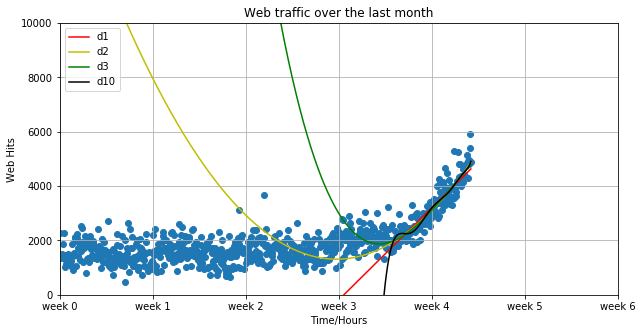

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time/Hours")
plt.ylabel("Web Hits")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.ylim(ymax=10000)
plt.xticks([w*7*24 for w in range(7)],["week %i"%w for w in range(7)])
fx1 = sp.linspace(0,x[-1], 1000) # generating evenly space numbers for x axis
plt.plot(fx1, fat1(fx1),'r',label="d1")
plt.plot(fx1, fat2(fx1),'y',label="d2")
plt.plot(fx1, fat3(fx1),'g',label="d3")
plt.plot(fx1, fat10(fx1),'black',label="d10")
plt.legend(loc=2)
plt.grid()

In [9]:
print(fat2)
print(fat2-100000)
from scipy.optimize import fsolve
reached_max = fsolve(fat2-100000, 600)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

         2
0.06043 x - 60.44 x + 1.643e+04
         2
0.06043 x - 60.44 x - 8.357e+04
100,000 hits/hour expected at week 10.583784
